In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import imdb
from keras import models, layers

#### IMDB Data load

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# 가장 자주 나타나는 단어 1만개만 사용
# x_train(data), y_train(labels) 는 리뷰를 담고 있는 배열
# x_test(data), y_test(labels) 는 부정, 긍정을 나타내는 리스트

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(max([max(max(x) for x in x_train)]))
# max index cnt

9999


In [5]:
word_index = imdb.get_word_index()
iw = {}
for key, value in word_index.items():
    iw[value] = key

# key, value 위치 변환

In [6]:
for i in x_train[0]:
    print(iw[i], end=' ')

print('\n')
print(iw[4499])

# 변환 결과 확인

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

#### 데이터 가공

In [7]:
# multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

In [8]:
# convert data to Vector
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
y_train = np.asarray(y_train).astype("float32") # 데이터 경량화
y_test = np.asarray(y_test).astype("float32") # 데이터 경량화

In [9]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (25000, 10000)
x_test: (25000, 10000)
y_train: (25000,)
y_test: (25000,)


#### 신경망 모델 생성

In [10]:
model = keras.Sequential()
# layers.Dense(유닛개수, 신경망 모델)
# 유닛개수: 층이 가진 표현공간의 차원
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# model compile

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### 검증

In [12]:
# 검증 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-07-14 12:44:23.800861: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 32ms/step - loss: 0.5088 - accuracy: 0.7951 - val_loss: 0.3857 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.9019 - val_loss: 0.3071 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9259 - val_loss: 0.2802 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1750 - accuracy: 0.9427 - val_loss: 0.3246 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1432 - accuracy: 0.9537 - val_loss: 0.2814 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1192 - accuracy: 0.9643 - val_loss: 0.2957 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0966 - accuracy: 0.9720 - val_loss: 0.3214 - val_accuracy: 0.8829
Epoch 8/20
30/30 [============

##### 훈련, 검증 손실 시각화

In [14]:
import matplotlib.pyplot as plt

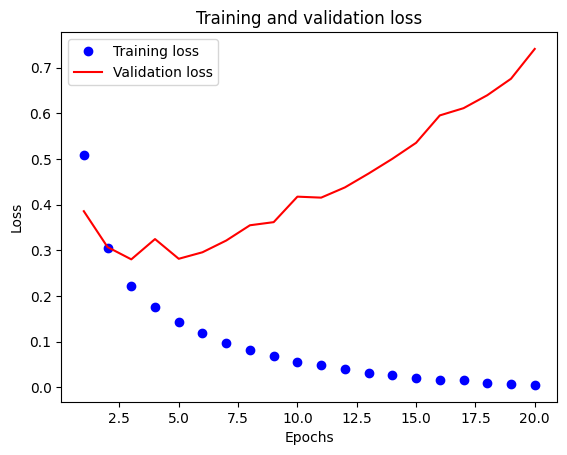

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

##### 훈련, 검증 정확도 시각화

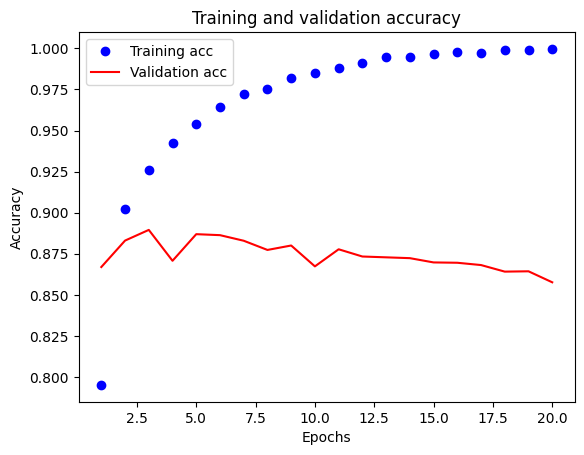

In [16]:
plt.clf() # reset plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 4번째 epoch에서 Overfitting 발생

##### 재검증

In [17]:
# 모델 재 생성
model = keras.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4622 - accuracy: 0.8139
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9278
Epoch 4/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1707 - accuracy: 0.9388


In [19]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 777us/step - loss: 0.2929 - accuracy: 0.8838


### overfitting 문제 해결

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
# 모델 재 생성
model = keras.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, callbacks=[EarlyStopping()], validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5472 - accuracy: 0.7805 - val_loss: 0.4262 - val_accuracy: 0.8538
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3360 - accuracy: 0.8990 - val_loss: 0.3245 - val_accuracy: 0.8818
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 0.2454 - accuracy: 0.9229 - val_loss: 0.2939 - val_accuracy: 0.8863
Epoch 4/50
30/30 [==============================] - 0s 8ms/step - loss: 0.1944 - accuracy: 0.9355 - val_loss: 0.2747 - val_accuracy: 0.8907
Epoch 5/50
30/30 [==============================] - 0s 8ms/step - loss: 0.1570 - accuracy: 0.9505 - val_loss: 0.2771 - val_accuracy: 0.8896


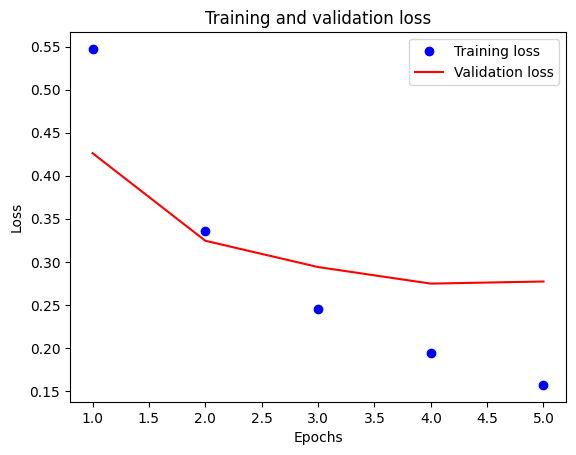

In [30]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

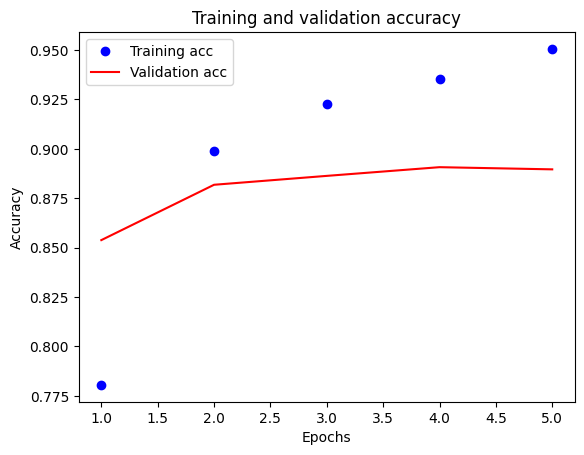

In [32]:
plt.clf() # reset plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()